In [38]:
import datetime
import time
import json
import os
import string
import requests
import sys
import traceback

import azure.cosmos.cosmos_client as cosmos_client
import pandas as pd

from arcgis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from helpers import keys

In [4]:
config = {
    'ENDPOINT': keys.cosmos_uri,
    'PRIMARYKEY': keys.cosmos_primary_key,
    'DATABASE': 'testdb',
    'CONTAINER': 'sample'
}

In [5]:
print("Connecting to Cosmos DB SQL API...")
client = cosmos_client.CosmosClient(url_connection=config['ENDPOINT'], auth={
                                    'masterKey': config['PRIMARYKEY']})

Connecting to Cosmos DB SQL API...


In [30]:
db_id = config['DATABASE']
db_query = "select * from r where r.id = '{0}'".format(db_id)
db = list(client.QueryDatabases(db_query))[0]
db_link = db['_self']

coll_id = config['CONTAINER']
coll_query = "select * from r where r.id = '{0}'".format(coll_id)
coll = list(client.QueryContainers(db_link, coll_query))[0]
coll_link = coll['_self']
coll

{'id': 'sample',
 'indexingPolicy': {'indexingMode': 'consistent',
  'automatic': True,
  'includedPaths': [{'path': '/*',
    'indexes': [{'kind': 'Range', 'dataType': 'Number', 'precision': -1},
     {'kind': 'Range', 'dataType': 'String', 'precision': -1},
     {'kind': 'Spatial', 'dataType': 'Point'}]}],
  'excludedPaths': [{'path': '/"_etag"/?'}]},
 'partitionKey': {'paths': ['/data'], 'kind': 'Hash'},
 'conflictResolutionPolicy': {'mode': 'LastWriterWins',
  'conflictResolutionPath': '/_ts',
  'conflictResolutionProcedure': ''},
 '_rid': 'bvs6AOFWQ3c=',
 '_ts': 1550192881,
 '_self': 'dbs/bvs6AA==/colls/bvs6AOFWQ3c=/',
 '_etag': '"00002900-0000-0000-0000-5c6610f10000"',
 '_docs': 'docs/',
 '_sprocs': 'sprocs/',
 '_triggers': 'triggers/',
 '_udfs': 'udfs/',
 '_conflicts': 'conflicts/'}

In [33]:
query = { 'query': 'SELECT * FROM c' }
docs = client.QueryItems(coll_link, query, options, partition_key='/data')
print(list(docs))

HTTPFailure: Status code: 400
{"code":"BadRequest","message":"Cross partition query is required but disabled. Please set x-ms-documentdb-query-enablecrosspartition to true, specify x-ms-documentdb-partitionkey, or revise your query to avoid this exception.\r\nActivityId: 98ba2aa1-8829-48a5-8d93-47a28898a284, Microsoft.Azure.Documents.Common/2.1.0.0"}

In [39]:
gis = GIS('http://esrifederal.maps.arcgis.com', keys.user_name, keys.password)

<Item title:"EmbassyMap" type:Feature Layer Collection owner:OliPhantCE_OCS>
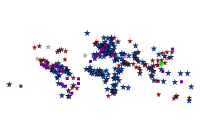

In [40]:
embassy_locations = gis.content.get('e17b84b94cb24fea83bf402b756e4f95')
embassy_locations

In [41]:
flayer = embassy_locations.layers[0]

# create a Spatially Enabled DataFrame object
sdf = pd.DataFrame.spatial.from_layer(flayer)
sdf.head()

,Address1,Address2,Address3,City,ConSvcProv,Country,EmailAddr,EmgcyTelNo,FaxNo,FullName,...,Info,Lat,LocType,Long_,OBJECTID,PostCode,SHAPE,TelNo,Website,ZipPostCode
0,Great Massoud (Airport) Road,,None,Kabul,Kabul,Afghanistan,kabulacs@state.gov,0700-108-001,(00 93) (0)700-108-564 or (0)202-300-546,U.S. Embassy Kabul,...,None,34.528128,EMB,69.172327,1,KBL,"{""x"": 7702130.784033022, ""y"": 4100763.18006797...",0700-108-001 or 0700-108-002,https://af.usembassy.gov,None
1,Rruga Elbasanit,No. 103,None,Tirana,Tirana,Albania,ACSTirana@state.gov,"+355-(0)4-224-7285 thru 89, and ask to speak w...",(355) (04) 237 4957,U.S. Embassy Tirana,...,None,41.367180,EMB,19.768744,2,TIA,"{""x"": 2207131.122656863, ""y"": 5059681.12513349...",(355)(4) 224 7285,http://tirana.usembassy.gov/,None
2,"5 Chemin Cheikh Bachir Ibrahimi,",El-Biar,,16030 Algiers,Algiers,Algeria,ACSAlgiers@state.gov,(213) 770-08-2200,0770-08-2064,U.S. Embassy Algiers\n\n,...,None,36.752497,EMB,3.041966,3,ALG,"{""x"": 338284.94517463667, ""y"": 4405067.6649505...",(213) 770-08-2000,http://algiers.usembassy.gov/,None
3,Rua Houari Boumedienne,#32,Miramar,Luanda,Luanda,Angola,consularluanda@state.gov,"(244) 222-641-000; (244) 923-64-0154, (244) 22...",(244) 222-64-1232,U.S. Embassy Luanda,...,None,-8.836818,EMB,13.234318,4,LUA,"{""x"": 1474497.5573943842, ""y"": -984619.5263218...","(244) 222-64-1000, (244) 946-44-0977, (244) 94...",https://ao.usembassy.gov/,None
4,Suite #2 Jasmine Court,Friars Hill Road,None,St. Johns,Antigua,Antigua,None,268-726-6531,None,U.S. Consular Agent - Antigua,...,The Consular Agent in Antigua can assist with ...,17.137419,CA,-61.835628,5,ATG,"{""x"": -6883510.6218422875, ""y"": 1936827.302198...",268-463-6531,None,None


In [46]:
city = 'London'
df = flayer.query(where="City = '{0}'".format(city)).sdf

In [48]:
print(df['Lat'], df['Long'])

KeyError: 'Long'